# Modelling Gradient Descent

Here we will create a simple algorithm that uses gradient descent to optimise a simple linear regression model. 
The data are fetched from the [BOM](http://www.bom.gov.au/climate/data/index.shtml) and show temperatures for the Sydney (Kinsford Smith) and Newcastle (Williamstown RAAF) airports. 

In [ ]:
# Import dependancies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
fulldataset = pd.read_csv('../datasets/AirportTemps.csv')
dataset = fulldataset.dropna()

# Plot the data (to observe correlation)
plt.scatter(dataset['MaxTempNewcastleAirport'],dataset['MaxTempSydneyAirport'],marker='x')
plt.xlabel('NCastle Temp')
plt.ylabel('Sydney Temp')
plt.show()

# See a sample of raw data
dataset.head()

FileNotFoundError: [Errno 2] No such file or directory: '../datasets/AirportTemps.csv'

Here's the beginnings of an OOP approach. It plots the existing data in blue and the predicted line in red. 


mse = 531.2686256339159


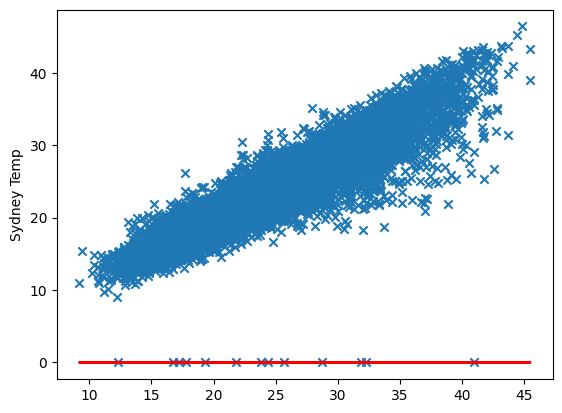

mse = 8.749651740747543


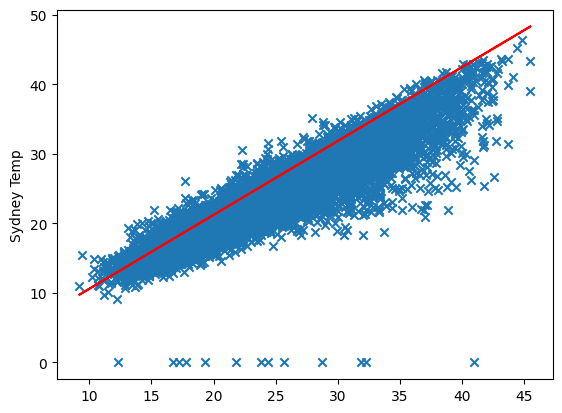

mse = 6.935901987400077


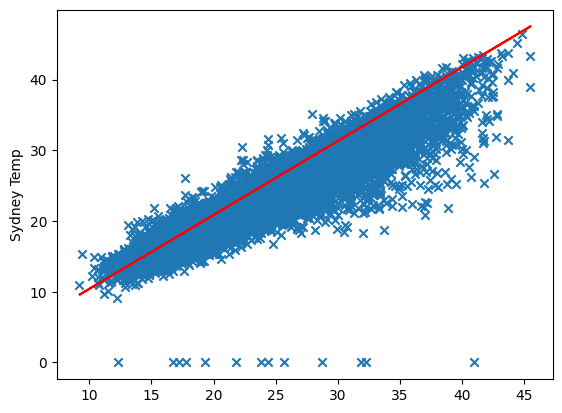

mse = 5.760221369824171


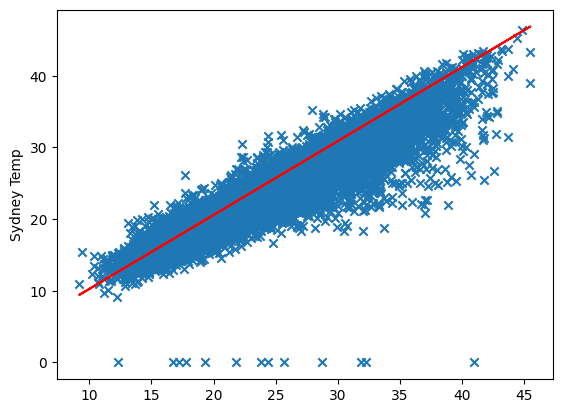

mse = 4.960716708670537


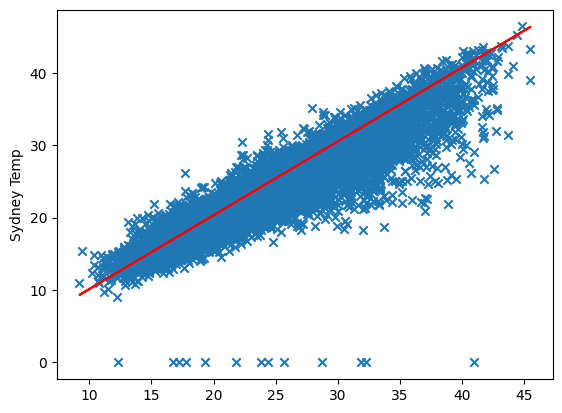

mse = 4.401246051012938


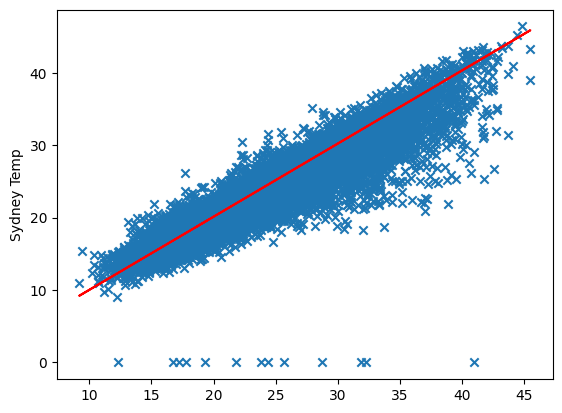

mse = 4.005149663482324


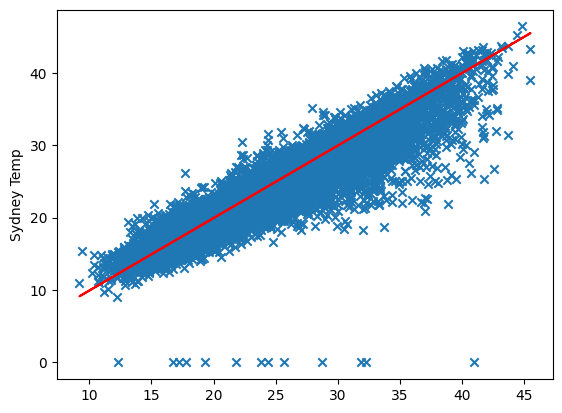

mse = 3.726843917117139


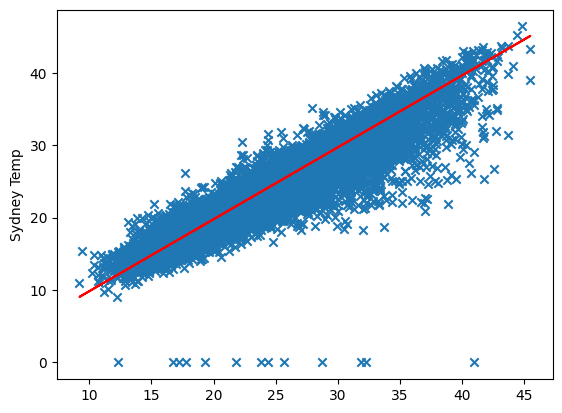

mse = 3.538339714811846


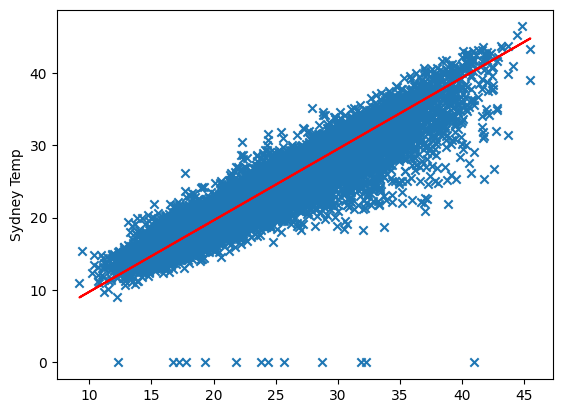

mse = 3.422362339045387


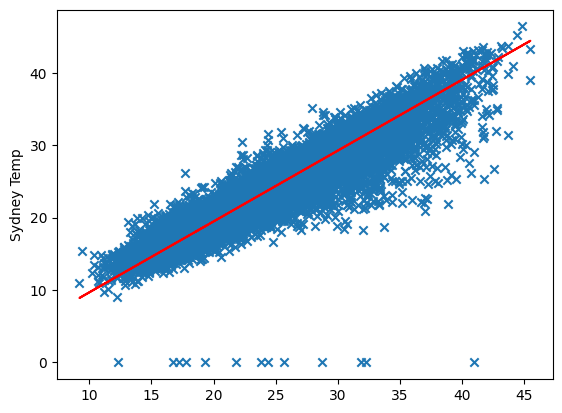

In [ ]:
# Import dependancies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
fulldataset = pd.read_csv('../datasets/AirportTemps.csv')
dataset = fulldataset.dropna()

class Model():
    def __init__(self, data):
        self.dataset = data
        self.m = 0
        self.b = 0
        self.learning_rate = 0.002
        self.cycles = 10

    def plot(self):
        predictions = self.predict()
        plt.scatter(self.dataset['MaxTempNewcastleAirport'],dataset['MaxTempSydneyAirport'],marker='x')
        plt.plot(self.dataset['MaxTempNewcastleAirport'],predictions, 'r')
        plt.ylabel('Sydney Temp')
        plt.show()

    def predict(self, m=None, b=None):
        if not m: 
            m = self.m
        if not b:
            b = self.b
        predictions = [x * m + b for x in dataset['MaxTempNewcastleAirport']]
        return predictions
    
    def loss(self, m=None, b=None):
        if not m: #This allows us to pass in m and b if desired, using the model's existing m and b as a fallback. 
            m = self.m
        if not b:
            b = self.b
        predictions = self.predict(m=m,b=b)
        loss = self.dataset['MaxTempSydneyAirport'] - predictions
        loss_squared = loss * loss
        mse = loss_squared.mean()
        return mse
    
    def decide_on_change_in_values(self):
        current_loss = self.loss()
        delta = current_loss * self.learning_rate
        m_increase_b_increase_loss = self.loss(m=(self.m + delta/10),b=(self.b + delta))
        m_increase_b_decrease_loss = self.loss(m=(self.m + delta/10),b=(self.b - delta))
        m_decrease_b_increase_loss = self.loss(m=(self.m - delta/10),b=(self.b + delta))
        m_decrease_b_decrease_loss = self.loss(m=(self.m - delta/10),b=(self.b - delta))

        list = {
            "id": [1, 2, 3, 4],
            "loss": [m_increase_b_increase_loss, m_increase_b_decrease_loss, m_decrease_b_increase_loss, m_decrease_b_decrease_loss]
        }
        df = pd.DataFrame(list)

        sorted_list = df.sort_values(by='loss')
        return(sorted_list.id.values[0])
    
    def decide_on_change_in_m(self):
        current_loss = self.loss()
        delta = current_loss * self.learning_rate
        value = self.decide_on_change_in_values()
        if value == 1 or value == 2:
            return delta
        elif value == 3 or value == 4:
            return delta * -1
        else:
            return 0
    
    def decide_on_change_in_b(self):
        current_loss = self.loss()
        delta = current_loss * self.learning_rate
        value = self.decide_on_change_in_values()
        if value == 1 or value == 3:
            return delta
        elif value == 2 or value == 4:
            return delta * -1
        else:
            return 0
        
    def train(self):
        for i in range(self.cycles):
            print(f"mse = {self.loss()}")
            self.plot()
            self.m = self.m + self.decide_on_change_in_m()
            self.b = self.b + self.decide_on_change_in_b()

model = Model(dataset)
model.train()
